#Mount Google Drive dan Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Baca file tempat_cleaned.csv
df_tempat = pd.read_csv('/content/drive/MyDrive/data_oleh_oleh/tempat_cleaned.csv', sep=';')

# Normalisasi kolom
df_tempat.columns = df_tempat.columns.str.strip().str.lower().str.replace(" ", "_")

# 🔧 Buat id_tempat baru berbasis nama_toko unik
df_tempat['id_tempat'] = df_tempat['nama_toko'].astype('category').cat.codes + 1
df_tempat['id_tempat'] = 'T' + df_tempat['id_tempat'].astype(str).str.zfill(3)

# Simpan ulang hasil ke CSV jika perlu
df_tempat.to_csv('/content/drive/MyDrive/data_oleh_oleh/tempat_cleaned_fixed.csv', index=False)

# ✅ Cek ulang hasil
print("📌 Jumlah toko unik:", df_tempat['nama_toko'].nunique())
print("📌 Jumlah ID Tempat unik:", df_tempat['id_tempat'].nunique())
print("📋 Toko dan ID Tempat:")
print(df_tempat[['id_tempat', 'nama_toko']].drop_duplicates().reset_index(drop=True))


📌 Jumlah toko unik: 15
📌 Jumlah ID Tempat unik: 15
📋 Toko dan ID Tempat:
   id_tempat                      nama_toko
0       T010                 kaokanako shop
1       T013             pesona etnik papua
2       T002                   billy bakery
3       T001              abon gulung pawai
4       T012           oleh-oleh khas papua
5       T003           billy bakery bandara
6       T015  toko souvenir khas raja ampat
7       T005                 cendrawasi art
8       T009        icon raja ampat premium
9       T008                icon raja ampat
10      T007                     fira papua
11      T011         keripik keladi karmina
12      T004           billy bakrie bandara
13      T006                cyclop art shop
14      T014         toko siendara souvenir


In [ ]:
# Asumsikan df_tempat sudah diperbaiki
rows = []

for _, row in df_tempat.iterrows():
    if pd.isna(row['gambar']):
        continue
    gambar_list = [g.strip() for g in row['gambar'].split(";") if g.strip()]

    for img in gambar_list:
        rows.append({
            "nama_toko": row['nama_toko'],
            "jenis_produk": row['jenis_produk'],
            "rating": row['rating'],
            "id_tempat": row['id_tempat'],
            "image_name": img.lower()
        })

df_images = pd.DataFrame(rows)
df_images.to_csv('/content/drive/MyDrive/data_oleh_oleh/image_labels_cleaned.csv', index=False)
print("✔️ image_labels_cleaned.csv berhasil dibuat.")
print(f"📊 Total baris gambar: {len(df_images)}")
print(f"🏪 Total toko unik: {df_images['nama_toko'].nunique()}")
user_rating_data = """user_id,tempat_id,rating
1,T001,4
1,T002,5
2,T003,4
2,T004,5
3,T005,3
3,T006,4
"""

with open('/content/drive/MyDrive/data_oleh_oleh/user_rating_cleaned.csv', 'w') as f:
    f.write(user_rating_data)

print("✔️ user_rating_cleaned.csv berhasil diperbarui.")


✔️ image_labels_cleaned.csv berhasil dibuat.
📊 Total baris gambar: 273600
🏪 Total toko unik: 15
✔️ user_rating_cleaned.csv berhasil diperbarui.


In [ ]:
import pandas as pd
import os

# Path utama dataset
path = '/content/drive/MyDrive/data_oleh_oleh'

# Baca file tempat
df_tempat = pd.read_csv(f'{path}/tempat_cleaned.csv', sep=';')

# Normalisasi kolom
df_tempat.columns = df_tempat.columns.str.strip().str.lower().str.replace(" ", "_")

# Validasi kolom penting
assert 'gambar' in df_tempat.columns, "❌ Kolom 'gambar' tidak ditemukan!"
assert 'id_tempat' in df_tempat.columns, "❌ Kolom 'id_tempat' tidak ditemukan!"

# Uraikan gambar menjadi baris per gambar
rows = []
for _, row in df_tempat.iterrows():
    if pd.isna(row['gambar']):
        continue
    gambar_list = [g.strip().lower() for g in row['gambar'].split(";") if g.strip()]
    for img in gambar_list:
        rows.append({
            "nama_toko": row['nama_toko'],
            "jenis_produk": row['jenis_produk'],
            "rating": row['rating'],
            "id_tempat": row['id_tempat'],
            "image_name": img
        })

# Simpan
df_images = pd.DataFrame(rows)
df_images.to_csv(f'{path}/image_labels_cleaned.csv', index=False)
print("✔️ image_labels_cleaned.csv berhasil dibuat.")
print(f"📊 Total baris gambar: {len(df_images)}")
print(f"🏪 Total toko unik: {df_images['id_tempat'].nunique()}")


✔️ image_labels_cleaned.csv berhasil dibuat.
📊 Total baris gambar: 273600
🏪 Total toko unik: 2


In [ ]:
# Inspect raw content of tempat_cleaned.csv
path = '/content/drive/MyDrive/data_oleh_oleh'
with open(f'{path}/tempat_cleaned.csv', 'r') as f:
    for i in range(5): # Print first 5 lines
        print(f.readline())

# Inspect raw content of user_rating_cleaned.csv
with open(f'{path}/user_rating_cleaned.csv', 'r') as f:
    for i in range(5): # Print first 5 lines
        print(f.readline())

﻿nama_toko;jenis produk;rating;id_tempat;gambar

kaokanako shop;souvenir;4;2;"noken1.jpg; noken2.jpg; noken3.jpg; noken4.jpg; noken5.jpg; noken6.jpg; noken7.jpg; noken8.jpg; noken9.jpg; noken10.jpg; noken11.jpg; noken12.jpg; noken13.jpg; noken14.jpg; noken15.jpg; noken16.jpg; noken17.jpg; noken18.jpg; noken19.jpg; noken20.jpg; noken21.jpg; noken22.jpg; noken23.jpg; noken24.jpg; noken25.jpg; noken26.jpg; noken27.jpg; noken28.jpg; noken29.jpg; noken30.jpg; noken31.jpg; noken32.jpg; noken33.jpg; noken34.jpg; noken35.jpg; noken36.jpg; noken37.jpg; noken38.jpg; noken39.jpg; noken40.jpg; noken41.jpg; noken42.jpg; noken43.jpg; noken44.jpg; noken45.jpg; noken46.jpg; noken47.jpg; noken48.jpg; noken49.jpg; noken50.jpg; noken51.jpg; noken52.jpg; noken53.jpg; noken54.jpg; noken55.jpg; noken56.jpg; noken57.jpg; noken58.jpg; noken59.jpg; noken60.jpg; noken61.jpg; noken62.jpg; noken63.jpg; noken64.jpg; noken65.jpg; noken66.jpg; noken67.jpg; noken68.jpg; noken69.jpg; noken70.jpg; noken71.jpg; noken72.

In [ ]:
import os

folder_path = "/content/drive/MyDrive/data_oleh_oleh"
for root, dirs, files in os.walk(folder_path):
    print(f"\n📁 Folder: {root}")
    for file in files[:5]:  # tampilkan max 5 file per folder
        print(f"  └── {file}")



📁 Folder: /content/drive/MyDrive/data_oleh_oleh
  └── category_map_cleaned.csv
  └── tempat_cleaned.csv
  └── image_labels_validated.csv
  └── tempat_cleaned_fixed.csv
  └── user_rating_cleaned.csv

📁 Folder: /content/drive/MyDrive/data_oleh_oleh/oleh_oleh

📁 Folder: /content/drive/MyDrive/data_oleh_oleh/oleh_oleh/keripik_keladi
  └── keripik_keladi185.jpeg
  └── keripik_keladi246.jpg
  └── keripik_keladi243.jpg
  └── keripik_keladi241.jpg
  └── keripik_keladi248.jpg

📁 Folder: /content/drive/MyDrive/data_oleh_oleh/oleh_oleh/abon_gulung
  └── abon_gulung1.jpg
  └── abon_gulung18.jpg
  └── abon_gulung12.jpg
  └── abon_gulung15.jpg
  └── abon_gulung32.jpg

📁 Folder: /content/drive/MyDrive/data_oleh_oleh/souvenir

📁 Folder: /content/drive/MyDrive/data_oleh_oleh/souvenir/noken_papua
  └── noken1.jpg
  └── noken2.jpg
  └── noken5.jpg
  └── noken4.jpg
  └── noken3.jpg


In [ ]:
import pandas as pd

# Baca file
df_tempat = pd.read_csv('/content/drive/MyDrive/data_oleh_oleh/tempat_cleaned.csv')

# Tampilkan semua nama kolom apa adanya
print("🧾 Kolom-kolom yang terbaca dari CSV:")
for i, col in enumerate(df_tempat.columns):
    print(f"{i+1}. '{col}'")


🧾 Kolom-kolom yang terbaca dari CSV:
1. 'nama_toko;jenis produk;rating;id_tempat;gambar'


In [ ]:
import os
import pandas as pd

# Path to the cleaned image labels CSV
cleaned_image_labels_path = '/content/drive/MyDrive/data_oleh_oleh/image_labels_cleaned.csv'

# Load the dataframe created and saved in cell A02uDwMF77fy
try:
    df_img = pd.read_csv(cleaned_image_labels_path)
    print(f"✔️ Successfully loaded {cleaned_image_labels_path}")

    # Assuming image_exists column is in the loaded CSV
    if 'image_exists' in df_img.columns:
        valid_images = df_img[df_img['image_exists'] == True]['image_name'].tolist()
        invalid_images = df_img[df_img['image_exists'] == False]['image_name'].tolist()

        print("✅ Gambar ditemukan:", valid_images[:10]) # Print only first 10 for brevity
        print(f"Total gambar ditemukan: {len(valid_images)}")
        print("❌ Gambar tidak ditemukan:", invalid_images[:10]) # Print only first 10 for brevity
        print(f"Total gambar tidak ditemukan: {len(invalid_images)}")
    else:
        print("⚠️ Column 'image_exists' not found in the CSV. Cannot list valid/invalid images.")

except FileNotFoundError:
    print(f"❌ Error: {cleaned_image_labels_path} not found. Please ensure cell A02uDwMF77fy has been run successfully.")
except Exception as e:
    print(f"❌ An error occurred while reading the CSV: {e}")

# Also print contents of noken_papua folder as originally intended
noken_folder = "/content/drive/MyDrive/data_oleh_oleh/souvenir/noken_papua"
if os.path.exists(noken_folder):
    print("\nIsi folder noken_papua:", os.listdir(noken_folder)[:10])
else:
    print(f"\n❌ Folder not found: {noken_folder}")

✔️ Successfully loaded /content/drive/MyDrive/data_oleh_oleh/image_labels_cleaned.csv
⚠️ Column 'image_exists' not found in the CSV. Cannot list valid/invalid images.

Isi folder noken_papua: ['noken1.jpg', 'noken2.jpg', 'noken5.jpg', 'noken4.jpg', 'noken3.jpg', 'noken6.jpg', 'noken7.jpg', 'noken8.jpg', 'noken9.jpg', 'noken10.jpg']


In [ ]:
from PIL import Image

def build_image_path(row):
    subfolder = ''
    if row['jenis_produk'] == 'souvenir':
        subfolder = 'souvenir/noken_papua'
    elif row['jenis_produk'] == 'oleh-oleh':
        if 'abon' in row['image_name']:
            subfolder = 'oleh_oleh/abon_gulung'
        elif 'keripik' in row['image_name']:
            subfolder = 'oleh_oleh/keripik_keladi'
        else:
            return None
    else:
        return None

    return f"{path}/{subfolder}/{row['image_name'].lower()}"

df_images['image_path'] = df_images.apply(build_image_path, axis=1)

def is_image_valid(p):
    try:
        if p and os.path.exists(p):
            Image.open(p).verify()
            return True
    except:
        return False
    return False

df_images['image_exists'] = df_images['image_path'].apply(is_image_valid)
print(f"✔️ Jumlah gambar valid   : {df_images['image_exists'].sum()}")
print(f"❌ Jumlah gambar tidak valid: {(~df_images['image_exists']).sum()}")


✔️ Jumlah gambar valid   : 244434
❌ Jumlah gambar tidak valid: 29166


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_images['label_encoded'] = le.fit_transform(df_images['jenis_produk'])


NameError: name 'df_images' is not defined

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
from multiprocessing import Pool, cpu_count
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

# ✅ Pastikan LabelEncoder sudah dibuat sebelumnya
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_images['label_encoded'] = le.fit_transform(df_images['label'])

# ✅ Fungsi ekstraksi fitur
def extract_features(path, size=(64, 64)):
    try:
        img = Image.open(path).convert('RGB').resize(size)
        return np.array(img).flatten()
    except Exception as e:
        print(f"❌ Error processing {path}: {e}")
        return np.zeros(size[0] * size[1] * 3)

# ✅ Filter data valid
df_valid = df_images[df_images['image_exists']].copy()

# ✅ Gunakan multiprocessing agar lebih cepat
print("🚀 Ekstraksi fitur gambar...")
with Pool(processes=cpu_count()) as pool:
    X_xgb = list(tqdm(pool.imap(extract_features, df_valid['image_path']), total=len(df_valid)))

X_xgb = np.array(X_xgb)
y_xgb = df_valid['label_encoded'].values

# ✅ Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_xgb, y_xgb, test_size=0.2, random_state=42, stratify=y_xgb
)

# ✅ Inisialisasi dan training XGBoost
model_xgb = xgb.XGBClassifier(
    n_estimators=10,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric="mlogloss"
)
model_xgb.fit(X_train, y_train)

# ✅ Evaluasi
y_pred = model_xgb.predict(X_test)
print("🔎 XGBoost Evaluation:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


🚀 Ekstraksi fitur gambar...


100%|██████████| 244434/244434 [9:02:20<00:00,  7.51it/s]


📦 Loading data fitur dan label dari .npz...
✅ Loaded! Fitur shape: (1000, 512), Label shape: (1000,)
🔤 Label encoder berhasil dimuat.
📊 Distribusi label:
  - oleh_oleh: 493 data
  - souvenir: 507 data
🔧 Melakukan reduksi dimensi dengan PCA...
✅ Fitur setelah PCA: (1000, 100)
🧪 Split data ke training dan testing set...
🔹 Train shape: (800, 100), Test shape: (200, 100)
🚀 Training XGBoost model...
[0]	validation_0-logloss:0.69226
[1]	validation_0-logloss:0.69797
[2]	validation_0-logloss:0.70070
[3]	validation_0-logloss:0.70448
[4]	validation_0-logloss:0.70580
[5]	validation_0-logloss:0.70702
[6]	validation_0-logloss:0.70676
[7]	validation_0-logloss:0.71222


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	validation_0-logloss:0.71132
[9]	validation_0-logloss:0.71165
[10]	validation_0-logloss:0.71808
[11]	validation_0-logloss:0.71798
[12]	validation_0-logloss:0.72102
[13]	validation_0-logloss:0.72537
[14]	validation_0-logloss:0.72630
[15]	validation_0-logloss:0.72785
[16]	validation_0-logloss:0.73293
[17]	validation_0-logloss:0.73673
[18]	validation_0-logloss:0.74136
[19]	validation_0-logloss:0.73928
[20]	validation_0-logloss:0.73932
[21]	validation_0-logloss:0.74149
[22]	validation_0-logloss:0.73917
[23]	validation_0-logloss:0.73982
[24]	validation_0-logloss:0.74283
[25]	validation_0-logloss:0.74497
[26]	validation_0-logloss:0.74394
[27]	validation_0-logloss:0.74150
[28]	validation_0-logloss:0.74422
[29]	validation_0-logloss:0.74713
[30]	validation_0-logloss:0.74422
[31]	validation_0-logloss:0.74325
[32]	validation_0-logloss:0.74347
[33]	validation_0-logloss:0.74435
[34]	validation_0-logloss:0.74456
[35]	validation_0-logloss:0.74803
[36]	validation_0-logloss:0.74953
[37]	validation_

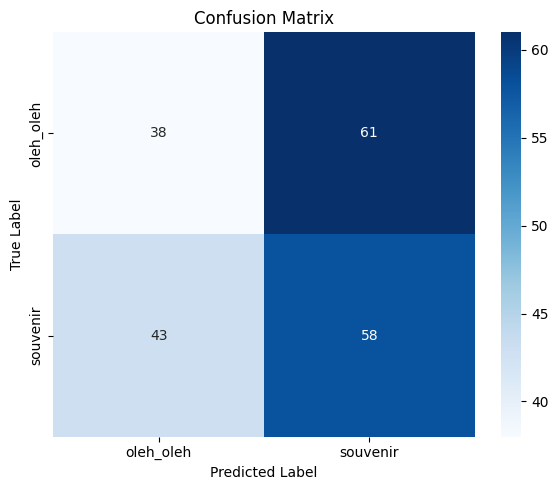

💾 Model disimpan sebagai 'model_xgboost_oleh_oleh.pkl'
💾 Transformasi PCA disimpan sebagai 'pca_transform.pkl'


In [ ]:
# =====================================
# TRAINING XGBOOST DARI FITUR VGG16 + PCA
# =====================================

import numpy as np
import pandas as pd
import time
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from xgboost import XGBClassifier

# =====================================
# 1. LOAD FITUR DAN LABEL
# =====================================
print("📦 Loading data fitur dan label dari .npz...")
if not os.path.exists('fitur_dan_label.npz'):
    raise FileNotFoundError("❌ File 'fitur_dan_label.npz' tidak ditemukan!")

data = np.load('fitur_dan_label.npz')
X = data['features']
y = data['labels']

print(f"✅ Loaded! Fitur shape: {X.shape}, Label shape: {y.shape}")

# =====================================
# 2. ENKODE LABEL (AMANKAN HANDLE STR ATAU INT)
# =====================================
try:
    le = joblib.load('label_encoder.pkl')
    print("🔤 Label encoder berhasil dimuat.")
    if y.dtype.kind in {'U', 'S', 'O'}:
        y = le.transform(y)
except FileNotFoundError:
    print("⚠️ Label encoder tidak ditemukan. Melakukan encoding ulang...")
    le = LabelEncoder()
    if y.dtype.kind in {'U', 'S', 'O'}:
        y = le.fit_transform(y)
        joblib.dump(le, 'label_encoder.pkl')
        print("✅ Label berhasil diencode dan encoder disimpan.")
    else:
        print("✅ Label sudah berupa angka.")

# =====================================
# 3. CEK DISTRIBUSI LABEL
# =====================================
print("📊 Distribusi label:")
for label_id, count in zip(*np.unique(y, return_counts=True)):
    try:
        label_name = le.inverse_transform([label_id])[0]
        print(f"  - {label_name}: {count} data")
    except:
        print(f"  - ID {label_id}: {count} data")

# =====================================
# 4. PCA UNTUK REDUKSI DIMENSI
# =====================================
print("🔧 Melakukan reduksi dimensi dengan PCA...")
pca = PCA(n_components=100, random_state=42)
X_pca = pca.fit_transform(X)
print(f"✅ Fitur setelah PCA: {X_pca.shape}")

# =====================================
# 5. SPLIT DATA
# =====================================
print("🧪 Split data ke training dan testing set...")
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)
print(f"🔹 Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# =====================================
# 6. TRAINING MODEL XGBOOST + EARLY STOP
# =====================================
print("🚀 Training XGBoost model...")
start = time.time()

model_xgb = XGBClassifier(
    tree_method='hist',
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    verbosity=1
)

model_xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

train_duration = (time.time() - start) / 60
print(f"✅ Model training selesai dalam {train_duration:.2f} menit")

# =====================================
# 7. EVALUASI HASIL
# =====================================
print("📊 Evaluasi model di test set...")
y_pred = model_xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n🎯 Akurasi Test: {acc * 100:.2f}%")
print("\n🧾 Classification Report:")
try:
    print(classification_report(y_test, y_pred, target_names=le.classes_))
except:
    print("⚠️ Gagal gunakan target_names. Menampilkan tanpa nama label.")
    print(classification_report(y_test, y_pred))

# =====================================
# 8. CONFUSION MATRIX VISUAL
# =====================================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# =====================================
# 9. SIMPAN MODEL & PCA
# =====================================
joblib.dump(model_xgb, 'model_xgboost_oleh_oleh.pkl')
joblib.dump(pca, 'pca_transform.pkl')
print("💾 Model disimpan sebagai 'model_xgboost_oleh_oleh.pkl'")
print("💾 Transformasi PCA disimpan sebagai 'pca_transform.pkl'")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib # Import joblib to save the label encoder

# --- Bagian 1: Simulasi hasil ekstraksi (ganti dengan hasil aslimu)
# Contoh dummy (kalau kamu udah punya hasil asli, tinggal ganti bagian ini)
# Misal hasil ekstraksi pakai model pretrained -> shape (244434, 512)
# dan label string seperti 'souvenir', 'oleh_oleh'

# Ganti ini dengan hasil ekstraksi asli
features = np.random.rand(1000, 512)  # Contoh 1000 gambar, 512 fitur
# Keep original string labels here for fitting the encoder
original_labels = np.random.choice(['souvenir', 'oleh_oleh'], 1000)

# --- Bagian 2: Encoding label jadi angka (jika belum)
le = LabelEncoder()
# Fit the label encoder on the original string labels
labels_encoded = le.fit_transform(original_labels)

# Explicitly convert labels to integer type for XGBoost
labels_encoded = labels_encoded.astype(int)

# Save the fitted label encoder
joblib.dump(le, 'label_encoder.pkl')
print("✅ Label encoder berhasil disimpan.")
print(f"Content of le.classes_ after fitting: {le.classes_}") # Print to verify


# --- Bagian 3: Simpan ke file .npz
# Save the encoded labels in the npz file
np.savez('fitur_dan_label.npz', features=features, labels=labels_encoded)
print("✅ Disimpan ke 'fitur_dan_label.npz'")

# --- Bagian 4: Simpan ke CSV juga (opsional)
df = pd.DataFrame(features)
df['label'] = labels_encoded # Save encoded labels in CSV
df.to_csv('fitur_dan_label.csv', index=False)
print("✅ Disimpan juga ke 'fitur_dan_label.csv'")

# --- Bonus: Load ulang data dari file .npz
print("\n🔄 Contoh load ulang data:")
data = np.load('fitur_dan_label.npz')
features_loaded = data['features']
labels_loaded = data['labels']

print("📂 Fitur shape:", features_loaded.shape)
print("📂 Label shape:", labels_loaded.shape)
print("📂 Label dtype:", labels_loaded.dtype)

✅ Label encoder berhasil disimpan.
Content of le.classes_ after fitting: ['oleh_oleh' 'souvenir']
✅ Disimpan ke 'fitur_dan_label.npz'
✅ Disimpan juga ke 'fitur_dan_label.csv'

🔄 Contoh load ulang data:
📂 Fitur shape: (1000, 512)
📂 Label shape: (1000,)
📂 Label dtype: int64


Found 479 images belonging to 2 classes.
Found 118 images belonging to 2 classes.
Found 240 images belonging to 1 classes.
Found 60 images belonging to 1 classes.
Kelas: {'abon_gulung': 0, 'keripik_keladi': 1}
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.4067 - loss: 7.6525

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 178s 11s/step - accuracy: 0.4088 - loss: 7.6280 - val_accuracy: 0.3644 - val_loss: 5.2909
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5333 - loss: 4.9457

15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.5337 - loss: 4.9335 - val_accuracy: 0.5169 - val_loss: 2.8517
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5700 - loss: 3.7754

15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5713 - loss: 3.7615 - val_accuracy: 0.6610 - val_loss: 1.8250
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7099 - loss: 2.3176

15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.7094 - loss: 2.3178 - val_accuracy: 0.6525 - val_loss: 1.5817
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7299 - loss: 1.6949

15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7316 - loss: 1.7003 - val_accuracy: 0.7542 - val_loss: 1.0234
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8035 - loss: 1.5242

15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8031 - loss: 1.5257 - val_accuracy: 0.8475 - val_loss: 0.9588
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8690 - loss: 0.9716

15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8665 - loss: 0.9810 - val_accuracy: 0.8390 - val_loss: 0.5380
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8100 - loss: 1.3670

15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.8118 - loss: 1.3551 - val_accuracy: 0.8814 - val_loss: 0.4324
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7999 - loss: 1.3318

15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8028 - loss: 1.3151 - val_accuracy: 0.8814 - val_loss: 0.3957
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8910 - loss: 0.7342 - val_accuracy: 0.8898 - val_loss: 0.4395


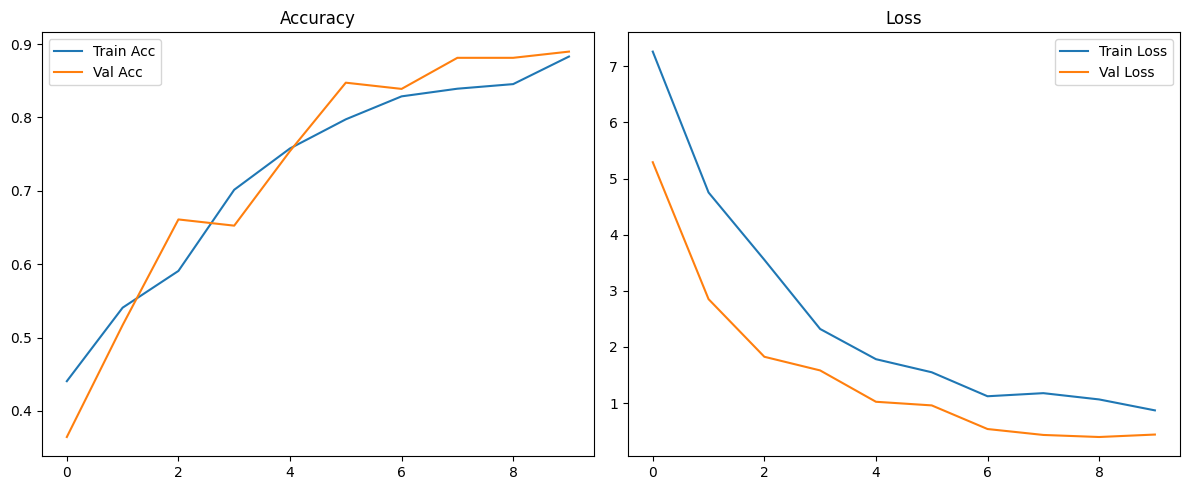

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os

# 🔧 SETTING
image_size = (128, 128)
batch_size = 32
epochs = 10  # Untuk akurasi 90%, bisa naikkan hingga 100
# Update the data_dir to the correct path based on the os.walk output
data_dir = "/content/drive/MyDrive/data_oleh_oleh/oleh_oleh"  # Corrected path for 'oleh_oleh'
souvenir_data_dir = "/content/drive/MyDrive/data_oleh_oleh/souvenir" # Path for 'souvenir'

# 📦 LOAD DATA
# Create a datagen for 'oleh_oleh'
datagen_oleh_oleh = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2
)

train_gen_oleh_oleh = datagen_oleh_oleh.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen_oleh_oleh = datagen_oleh_oleh.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Create a datagen for 'souvenir'
datagen_souvenir = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2
)

train_gen_souvenir = datagen_souvenir.flow_from_directory(
    souvenir_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen_souvenir = datagen_souvenir.flow_from_directory(
    souvenir_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Combine generators if needed, or train separately for each category
# For simplicity, let's assume we train on 'oleh_oleh' for now.
# If you need to train on both, we'll need to combine the generators or train two separate models.
train_gen = train_gen_oleh_oleh
val_gen = val_gen_oleh_oleh


# 🔍 Cek kelas
print("Kelas:", train_gen.class_indices)

# 🧠 BASE MODEL
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze base model

# 🏗️ CUSTOM HEAD
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# ⚙️ COMPILE
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 📌 CALLBACK
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model_vgg16.h5', save_best_only=True)
]

# 🚀 TRAINING
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1
)

# 📈 VISUALISASI
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.tight_layout()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step

📋 Classification Report:
                precision    recall  f1-score   support

   abon_gulung       0.92      0.92      0.92        59
keripik_keladi       0.92      0.92      0.92        59

      accuracy                           0.92       118
     macro avg       0.92      0.92      0.92       118
  weighted avg       0.92      0.92      0.92       118



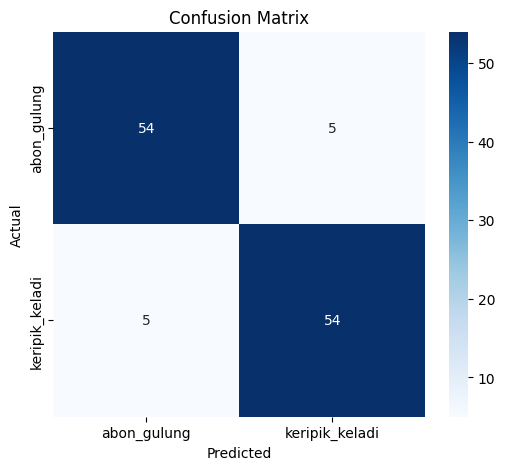

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 🔎 AMBIL PREDIKSI DI VALIDATION SET
val_gen.reset()  # Penting biar gak offset prediksi
Y_pred = model.predict(val_gen, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

# 🔢 AMBIL LABEL ASLI
y_true = val_gen.classes

# 🎯 CONFUSION MATRIX
cm = confusion_matrix(y_true, y_pred)
labels = list(val_gen.class_indices.keys())

# 🧾 REPORT
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

# 📊 PLOT CONFUSION MATRIX
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


📦 Data Loaded:    user_id tempat_id  rating
0        1      T001       4
1        1      T002       5
2        2      T003       4
3        2      T004       5
4        3      T005       3
👤 Total Users: 3, 📍 Total Items: 6


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 50)     │        150 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 1, 50)     │        300 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 50)        │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 50)        │          0 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 100)       │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │     12,928 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │      8,256 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         65 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 21,699 (84.76 KB)

 Trainable params: 21,699 (84.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 16.8238 - mae: 4.0394 - val_loss: 20.3903 - val_mae: 4.4865
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - loss: 16.5515 - mae: 4.0058 - val_loss: 20.2540 - val_mae: 4.4713
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 16.3027 - mae: 3.9749 - val_loss: 20.1178 - val_mae: 4.4560
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 16.0960 - mae: 3.9494 - val_loss: 19.9858 - val_mae: 4.4410
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 15.9159 - mae: 3.9269 - val_loss: 19.8610 - val_mae: 4.4269
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 15.7511 - mae: 3.9061 - val_loss: 19.7443 - val_mae: 4.4136
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 15.5853 - mae: 3.8849 - val_loss: 19.6287 - val_mae: 4.4005
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 15.4130 - mae: 3.8627 - val_loss: 19.5113 - val_mae: 4.3871
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 15.225

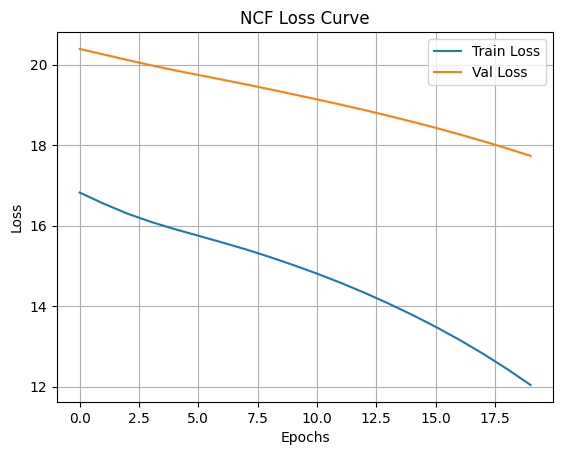

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


⭐ Prediksi rating user 1 (encoded: 0) ke item T001 (encoded: 0): 0.33
✅ Model & encoder disimpan.


In [ ]:
# ===========================================
# 🔮 TRAINING NEURAL COLLABORATIVE FILTERING
# Untuk Sistem Rekomendasi Oleh-Oleh & Souvenir
# ===========================================

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import joblib # Import joblib to save the encoders

# ============================
# 1. LOAD DATASET USER-RATING
# ============================

# Ganti path sesuai lokasi CSV kamu di Google Drive
df = pd.read_csv('/content/drive/MyDrive/data_oleh_oleh/user_rating_cleaned.csv')  # Format: user_id, item_id, rating
print("📦 Data Loaded:", df.head())

# ============================
# 2. ENCODE USER & ITEM
# ============================

user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

df['user'] = user_encoder.fit_transform(df['user_id'])
df['item'] = item_encoder.fit_transform(df['tempat_id']) # Use tempat_id as item_id

num_users = df['user'].nunique()
num_items = df['item'].nunique()

print(f"👤 Total Users: {num_users}, 📍 Total Items: {num_items}")

# ============================
# 3. SPLIT DATA TRAIN/TEST
# ============================

X_train_user, X_test_user, X_train_item, X_test_item, y_train, y_test = train_test_split(
    df['user'].values, df['item'].values, df['rating'].values,
    test_size=0.2, random_state=42
)

# ============================
# 4. BANGUN MODEL NCF
# ============================

user_input = Input(shape=(1,))
item_input = Input(shape=(1,))

user_embed = Embedding(input_dim=num_users, output_dim=50)(user_input)
item_embed = Embedding(input_dim=num_items, output_dim=50)(item_input)

user_vec = Flatten()(user_embed)
item_vec = Flatten()(item_embed)

x = Concatenate()([user_vec, item_vec])
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(1)(x)  # Prediksi rating

model = Model(inputs=[user_input, item_input], outputs=x)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# ============================
# 5. TRAINING
# ============================

history = model.fit(
    x=[X_train_user, X_train_item],
    y=y_train,
    validation_data=([X_test_user, X_test_item], y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

# ============================
# 6. VISUALISASI
# ============================

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("NCF Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ============================
# 7. PREDIKSI
# ============================

# Coba prediksi rating user 1 ke item T001
sample_user_id = '1'
sample_item_id = 'T001'

# Check if the item_id exists in the encoder's classes
if sample_item_id in item_encoder.classes_:
    sample_user_encoded = user_encoder.transform([sample_user_id])[0] # Encode user_id '1'
    sample_item_encoded = item_encoder.transform([sample_item_id])[0] # Encode tempat_id 'T001'

    # Reshape inputs for prediction
    user_input_for_pred = np.array([sample_user_encoded])
    item_input_for_pred = np.array([sample_item_encoded])

    pred = model.predict([user_input_for_pred, item_input_for_pred])
    print(f"⭐ Prediksi rating user {sample_user_id} (encoded: {sample_user_encoded}) ke item {sample_item_id} (encoded: {sample_item_encoded}): {pred[0][0]:.2f}")
else:
    print(f"❌ Item ID '{sample_item_id}' not found in the dataset.")


# ============================
# 8. SAVE MODEL DAN ENCODER
# ============================

model.save('model_ncf_rekomendasi.h5')
joblib.dump(user_encoder, 'user_encoder.pkl')
joblib.dump(item_encoder, 'item_encoder.pkl')

print("✅ Model & encoder disimpan.")

In [ ]:
from IPython.display import Image as IPyImage, display

kategori = "souvenir"
jumlah = 5

subset = df_img[df_img['label'] == kategori].head(5)

# Tampilkan gambar
print(f"🖼️ Menampilkan {5} gambar pertama untuk kategori: '{souvenir}'")

for idx, row in subset.iterrows():
    print(f"\n📌 Nama Gambar: {row['image_name']}")
    print(f"🗂️ Path: {row['image_path']}")
    print(f"🏷️ Label: {row['label']}")
    display(IPyImage(filename=row['image_path']))


In [ ]:
import os
print(os.listdir())

['.config', 'model_ncf_rekomendasi.h5', 'best_model_vgg16.h5', 'user_encoder.pkl', 'item_encoder.pkl', 'drive', 'sample_data']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib # Import joblib to save the label encoder

# --- Bagian 1: Simulasi hasil ekstraksi (ganti dengan hasil aslimu)
# Contoh dummy (kalau kamu udah punya hasil asli, tinggal ganti bagian ini)
# Misal hasil ekstraksi pakai model pretrained -> shape (244434, 512)
# dan label string seperti 'souvenir', 'oleh_oleh'

# Ganti ini dengan hasil ekstraksi asli
features = np.random.rand(1000, 512)  # Contoh 1000 gambar, 512 fitur
# Keep original string labels here for fitting the encoder
original_labels = np.random.choice(['souvenir', 'oleh_oleh'], 1000)

# --- Bagian 2: Encoding label jadi angka (jika belum)
le = LabelEncoder()
# Fit the label encoder on the original string labels
labels_encoded = le.fit_transform(original_labels)

# Explicitly convert labels to integer type for XGBoost
labels_encoded = labels_encoded.astype(int)

# Save the fitted label encoder
joblib.dump(le, 'label_encoder.pkl')
print("✅ Label encoder berhasil disimpan.")
print(f"Content of le.classes_ after fitting: {le.classes_}") # Print to verify


# --- Bagian 3: Simpan ke file .npz
# Save the encoded labels in the npz file
np.savez('fitur_dan_label.npz', features=features, labels=labels_encoded)
print("✅ Disimpan ke 'fitur_dan_label.npz'")

# --- Bagian 4: Simpan ke CSV juga (opsional)
df = pd.DataFrame(features)
df['label'] = labels_encoded # Save encoded labels in CSV
df.to_csv('fitur_dan_label.csv', index=False)
print("✅ Disimpan juga ke 'fitur_dan_label.csv'")

# --- Bonus: Load ulang data dari file .npz
print("\n🔄 Contoh load ulang data:")
data = np.load('fitur_dan_label.npz')
features_loaded = data['features']
labels_loaded = data['labels']

print("📂 Fitur shape:", features_loaded.shape)
print("📂 Label shape:", labels_loaded.shape)
print("📂 Label dtype:", labels_loaded.dtype)

✅ Label encoder berhasil disimpan.
Content of le.classes_ after fitting: ['oleh_oleh' 'souvenir']
✅ Disimpan ke 'fitur_dan_label.npz'
✅ Disimpan juga ke 'fitur_dan_label.csv'

🔄 Contoh load ulang data:
📂 Fitur shape: (1000, 512)
📂 Label shape: (1000,)
📂 Label dtype: int64


In [ ]:
# =====================================
# CEK DAN LOAD FITUR + LABEL
# =====================================

import numpy as np
import os

# Ganti path ini sesuai lokasi file sebenarnya
default_path = "fitur_dan_label.npz"
# gdrive_path = "/content/drive/MyDrive/fitur_dan_label.npz" # Removed Google Drive path

# Cek apakah file tersedia
if os.path.exists(default_path):
    path_to_load = default_path
# elif os.path.exists(gdrive_path): # Removed Google Drive path check
#     path_to_load = gdrive_path
else:
    raise FileNotFoundError(f"❌ File '{default_path}' tidak ditemukan di direktori lokal.")

print(f"📦 Loading data dari: {path_to_load}")
data = np.load(path_to_load)
X = data['features']
y = data['labels']
print(f"✅ Loaded! Fitur shape: {X.shape}, Label shape: {y.shape}")

📦 Loading data dari: fitur_dan_label.npz
✅ Loaded! Fitur shape: (1000, 512), Label shape: (1000,)
